# Data Cleaning

Always the first step. Let's dive in!


***


## **Setup**


For this lab, we will be using the following libraries:
 - [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for managing the data.
 - [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for mathematical operations.
 - [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for visualizing the data.
 - [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for machine learning and machine-learning-pipeline related functions.
 - [`scipy`](https://docs.scipy.org/doc/scipy/tutorial/stats.html/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) for statistical computations.


## **Import the required libraries**


These are listed from the data cleaning lab.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy import stats

## **Reading and understanding our data**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This final assignment will use a dataset from the WHO concerning life expectancy. Let's explor it.


Let's read the data into *pandas* data frame and look at the first 5 rows using the `head()` method.


In [ ]:
file_path = r"/content/drive/MyDrive/Coursera-ML/Life Expectancy Data.csv"
who_df = pd.read_csv(file_path)

We can find more information about the features and types using the `info()`  method.


In [ ]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

According to the output above, we have 2938 entries, 0 to 2937, as well as 22 features. The "Non-Null Count" column shows the number of non-null entries.  If the count is 2938 then there is no missing values for that particular feature. 'Life expectancy' is our target or response variable and the rest of the features are our predictor variables.

We also have a mix of numerical and object data types.


Next, let's use the `describe()` function to show the count, mean, min, max of the sale price attribute.


In [ ]:
who_df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

Note: there is a space at the end of our target variable name.

In [ ]:
who_df['Life expectancy '].describe()

,Life expectancy
count,2928.000000
mean,69.224932
std,9.523867
min,36.300000
25%,63.100000
50%,72.100000
75%,75.700000
max,89.000000


From the above analysis, it is important to note that the minimum value is greater than 0.


The `describe()` function reveals the statistical information about the numeric attributes. To reveal some information about our categorical (object) attributes, we can use `value_counts()` function. In this exercise, describe all categories of the 'Sale Condition' attribute.


In [ ]:
who_df['Country'].value_counts()

,count
Country,
Afghanistan,16
Albania,16
Algeria,16
Angola,16
Antigua and Barbuda,16
...,...
Monaco,1
Marshall Islands,1
Saint Kitts and Nevis,1


That's a lot of variables to one-hot encode. We might drop this column or remove variables that only have a single value.

In [ ]:
value_counts = who_df['Country'].value_counts()

In [ ]:
filtered_counts = value_counts[value_counts > 1]
print(filtered_counts)

Country
Afghanistan                                             16
Albania                                                 16
Algeria                                                 16
Angola                                                  16
Antigua and Barbuda                                     16
                                                        ..
United Kingdom of Great Britain and Northern Ireland    16
Vanuatu                                                 16
Venezuela (Bolivarian Republic of)                      16
United States of America                                16
Uruguay                                                 16
Name: count, Length: 183, dtype: int64


In [ ]:
filtered_counts.unique()

array([16])

Well, seems like we have 183 countries that all have 16 records. This could get messy as one-hot encoding will create a new column for each country (minus 1). However, looking at the columns there is a GDP feature that will match to the corresponding country, so I think it is safe to drop the country column and simply use GDP.
Let's have a look at the other categorical column: 'Status'.

In [ ]:
value_counts = who_df['Status'].value_counts()

In [ ]:
value_counts

,count
Status,
Developing,2426
Developed,512


Great! This column designates whether or not the the country is qualified as developed or not. We can easily encode this variable into binary values.

In [ ]:
who_df.drop(['Country'], axis=1, inplace=True)
who_df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
who_df['Status'] = who_df['Status'] == 'Developed'
who_df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,False,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,False,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,False,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,False,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,False,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
who_df['Status'] = who_df['Status'].astype('int64')

In [ ]:
who_df.head()

,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## **Looking for Correlations**


Before proceeding with the data cleaning, it is useful to establish a correlation between the response variable (in our case the sale price) and other predictor variables, as some of them might not have any major impact in determining the price of the house and will not be used in the analysis.  There are many ways to discover correlation between the target variable and the rest of the features. Building pair plots, scatter plots, heat maps, and a correlation matrixes are the most common ones. Below, we will use the `corr()` function to list the top features based on the [pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) (measures how closely two sequences of numbers are correlated). Correlation coefficient can only be calculated on the numerical attributes (floats and integers), therefore, only the numeric attributes will be selected.


In [ ]:
who_num = who_df.select_dtypes(include = ['float64', 'int64'])
who_num_corr = who_num.corr()['Life expectancy '] # -1 means that the latest row is SalePrice
top_features = who_num_corr[abs(who_num_corr) > 0.5].sort_values(ascending=False) #displays pearsons correlation coefficient greater than 0.5
print("There is {} strongly correlated values with Life Expectancy:\n{}".format(len(top_features), top_features))

There is 6 strongly correlated values with Life Expectancy:
Life expectancy                    1.000000
Schooling                          0.751975
Income composition of resources    0.724776
 BMI                               0.567694
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64


How interesting... schooling has a high correlation with life expectancy - someone should tell the US government! Just kiddding (kind of) but it is interesting to note. However, there can be underlying factors that actually CAUSE higher education and life expectancy.

Next, let's generate some par plots to visually inspect the correlation between some of these features and the target variable. We will use seaborns `sns.pairplot()` function for this analysis. Also, building pair plots is one of the possible ways to spot the outliers that might be present in the data.


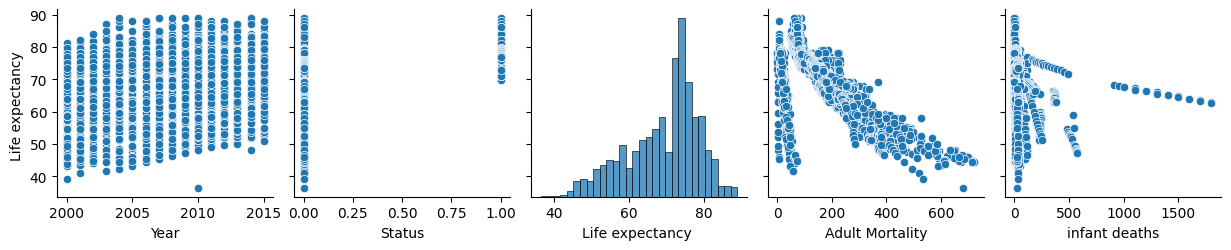

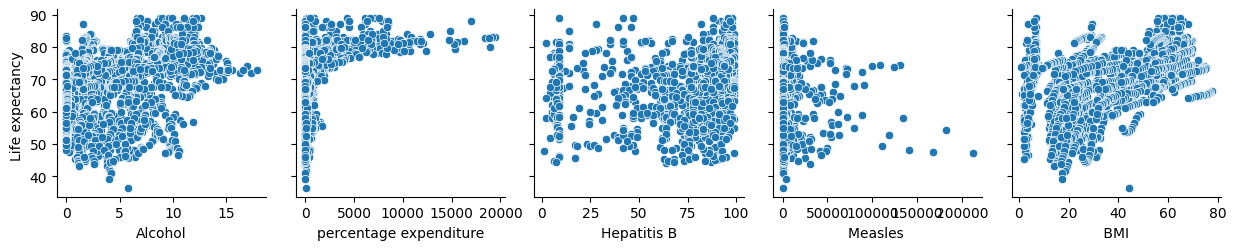

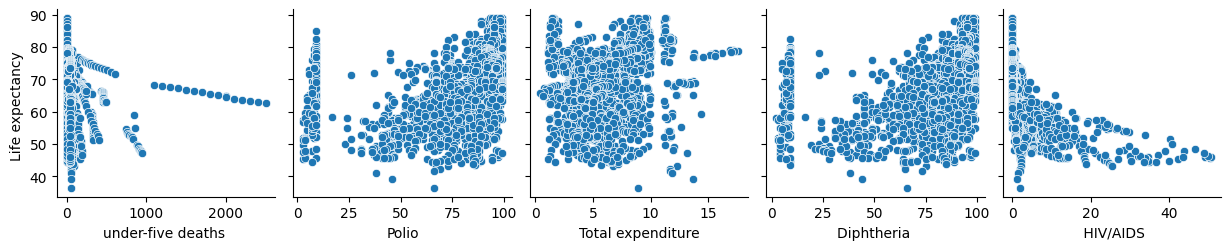

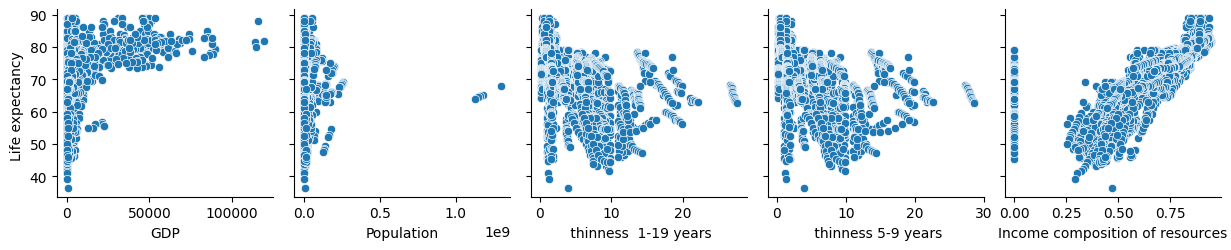

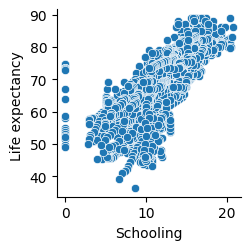

In [ ]:
for i in range(0, len(who_num.columns), 5):
    sns.pairplot(data=who_num,
                x_vars=who_num.columns[i:i+5],
                y_vars=['Life expectancy '])

From Pearsons Correlation Coefficients and pair plots, we can draw some conclusions about the features that are most strongly correlated to the 'SalePrice'. They are: 'Overall Qual', 'Gr Liv Area', 'Garage Cars', 'Garage Area', and others.


## **Log Transformation**


In this section, we are going to inspect whether our 'SalePrice' data are normally distributed. The assumption of the normal distribution must be met in order to perform any type of regression analysis. There are several ways to check for this assumption, however here, we will use the visual method, by plotting the 'SalePrice' distribution using the `distplot()` function from the `seaborn` library.


In [ ]:
sp_untransformed = sns.distplot(housing['SalePrice'])

As the plot shows, our 'SalePrice' deviates from the normal distribution. It has a longer tail to the right, so we call it a positive skew. In statistics *skewness* is a measure of asymmetry of the distribution. In addition to skewness, there is also a kurtosis, parameter which refers to the pointedness of a peak in the distribution curve. Both skewness and kurtosis are frequently used together to characterize the distribution of data.


Here, we can simply use the `skew()` function to calculate our skewness level of the `SalePrice`.


In [ ]:
print("Skewness: %f" % housing['SalePrice'].skew())

The range of skewness for a fairly symmetrical bell curve distribution is between -0.5 and 0.5; moderate skewness is -0.5 to -1.0 and 0.5 to 1.0; and highly skewed distribution is < -1.0 and > 1.0. In our case, we have ~1.7, so it is considered  highly skewed data.

Now, we can try to transform our data, so it looks more normally distributed. We can use the `np.log()` function from the `numpy` library to perform log transform. This [documentation](https://numpy.org/doc/stable/reference/generated/numpy.log.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) contains more information about the numpy log transform.


In [ ]:
log_transformed = np.log(housing['SalePrice'])

In [ ]:
sp_transformed = sns.distplot(log_transformed)

In [ ]:
print("Skewness: %f" % (log_transformed).skew())

As we can see, the log method transformed the 'SalePrice' distribution into a more symmetrical bell curve and the skewness level now is -0.01, well within the range.

There are other ways to correct for skewness of the data. For example, Square Root Transform (`np.sqrt`) and the Box-Cox Transform (`stats.boxcox` from the `scipy stats` library). To learn more about these two methods, please check out this [article](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


## Exercise 2


In this exercise, visually inspect the 'Lot Area' feature. If there is any skewness present, apply log transform to make it more normally distributed.


In [ ]:
# Enter your code and run the cell

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
la_plot = sns.distplot(housing['Lot Area'])
print("Skewness: %f" % housing['Lot Area'].skew())
la_log = np.log(housing['Lot Area'])
print("Skewness: %f" % la_log.skew())

</code>
</details>


## **Handling the Duplicates**


As mentioned in the video, having duplicate values can effect our analysis, so it is good to check whether there are any duplicates in our data. We will use pandas `duplicated()` function and search by the 'PID' column, which contains a unique index number for each entry.


In [ ]:
duplicate = housing[housing.duplicated(['PID'])]
duplicate

As we can see, there is one duplicate row in this dataset. To remove it, we can use pandas `drop_duplicates()` function. By default, it removes all duplicate rows based on all the columns.


In [ ]:
dup_removed = housing.drop_duplicates()
dup_removed

An alternative way to check if there are any duplicated Indexes in our dataset is using `index.is_unique` function.


In [ ]:
housing.index.is_unique

## Exercise 3


In this exercise try to remove duplicates on a specific column by setting the subset equal to the column that contains the duplicate, such as 'Order'.


In [ ]:
# Enter your code and run the cell

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
removed_sub = housing.drop_duplicates(subset=['Order'])
</code>
</details>


## **Handling the Missing Values**


### Finding the Missing Values


For easier detection of missing values, pandas provides the `isna()`, `isnull()`, and `notna()` functions. For more information on pandas missing values please check out this [documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


To summarize all the missing values in our dataset, we will use `isnull()` function. Then, we will add them all up, by using `sum()` function, sort them with `sort_values()` function, and plot the first 20 columns (as the majority of our missing values fall within first 20 columns), using the `bar plot` function from the `matplotlib` library.


In [ ]:
total = housing.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

There are several options for dealing with missing values. We will use 'Lot Frontage' feature to analyze for missing values.


1. We can drop the missing values, using `dropna()` method.


In [ ]:
housing.dropna(subset=["Lot Frontage"])

Using this method, all the rows, containing null values in 'Lot Frontage' feature, for example, will be dropped.


2. We can drop the whole attribute (column), that contains missing values, using the `drop()` method.


In [ ]:
housing.drop("Lot Frontage", axis=1)

Using this method, the entire column containing the null values will be dropped.


3. We can replace the missing values (zero, the mean, the median, etc.), using `fillna()` method.


In [ ]:
median = housing["Lot Frontage"].median()
median

In [ ]:
housing["Lot Frontage"].fillna(median, inplace = True)

In [ ]:
housing.tail()

Index# 2927, containing a missing value in the "Lot Frontage", now has been replaced with the median value.


## Exercise 4


In this exercise, let's look at 'Mas Vnr Area' feature and replace the missing values with the mean value of that column.


In [ ]:
# Enter your code and run the cell

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
mean = housing["Mas Vnr Area"].mean()
housing["Mas Vnr Area"].fillna(mean, inplace = True)   
</code>
</details>


## **Feature Scaling**


One of the most important transformations we need to apply to our data is feature scaling.  There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.

Min-max scaling (or normalization) is the simplest: values are shifted and rescaled so they end up ranging from 0 to 1. This is done by subtracting the min value and dividing by the max minus min.

Standardization is different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the standard deviation, so that the resulting distribution has unit variance.



Scikit-learn library provides `MinMaxScaler` for normalization and `StandardScaler` for standardization needs. For more information on `scikit-learn` [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) and [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) please visit their respective documentation websites.


First, we will normalize our data.


In [ ]:
norm_data = MinMaxScaler().fit_transform(hous_num)
norm_data

Note the data is now a `ndarray`


we can also standardize our data.


In [ ]:
scaled_data = StandardScaler().fit_transform(hous_num)
scaled_data

## Exercise 5


In this exercise, use `StandardScaler()` and `fit_transform()` functions to standardize the 'SalePrice' feature only.


In [ ]:
# Enter your code and run the cell

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
scaled_sprice = StandardScaler().fit_transform(housing['SalePrice'][:,np.newaxis])
scaled_sprice
</code>
</details>



## **Handling the Outliers**


### Finding the Outliers


In statistics, an outlier is an observation point that is distant from other observations. An outlier can be due to some mistakes in data collection or recording, or due to natural high variability of data points. How to treat an outlier highly depends on our data or the type of analysis to be performed. Outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

There are many ways to discover outliers in our data. We can do Uni-variate analysis (using one variable analysis) or Multi-variate analysis (using two or more variables). One of the simplest ways to detect an outlier is to inspect the data visually, by making box plots or scatter plots.


### Uni-variate Analysis


A box plot is a method for graphically depicting groups of numerical data through their quartiles. Box plots may also have lines extending vertically from the boxes (whiskers) indicating variability outside the upper and lower quartiles. Outliers may be plotted as individual points. To learn more about box plots please click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


Here, we will use a box plot for the 'Lot Area' and the 'SalePrice' features.


In [ ]:
sns.boxplot(x=housing['Lot Area'])

In [ ]:
sns.boxplot(x=housing['SalePrice'])

As we can see from these two plots, we have some points that are plotted outside the box plot area and that greatly deviate from the rest of the population. Whether to remove or keep them will greatly depend on the understanding of our data and the type of analysis to be performed. In this case, the points that are outside of our box plots in the 'Lot Area' and the 'Sale Price' might be the actual true data points and do not need to be removed.


### Bi-variate Analysis


Next, we will look at the bi-variate analysis of the two features, the sale price, 'SalePrice', and the ground living area, 'GrLivArea', and plot the scatter plot of the relationship between these two parameters.


In [ ]:
price_area = housing.plot.scatter(x='Gr Liv Area',
                      y='SalePrice')

From the above graph, there are two values above 5000 sq. ft. living area that deviate from the rest of the population and do not seem to follow the trend. It can be speculated why this is happening but for the purpose of this lab we can delete them.

The other two observations on the top are also deviating from the rest of the points but they also seem to be following the trend, so, perhaps, they can be kept.


### Deleting the Outliers


First, we will sort all of our 'Gr Liv Area' values and select only the last two.


In [ ]:
housing.sort_values(by = 'Gr Liv Area', ascending = False)[:2]

Now we will use the pandas `drop()` function to remove these two rows.


In [ ]:
outliers_dropped = housing.drop(housing.index[[1499,2181]])

In [ ]:
new_plot = outliers_dropped.plot.scatter(x='Gr Liv Area',
                                         y='SalePrice')

As you can see, we do not have the last two points of the 'Gr Liv Area' anymore.


## Exercise 6


In this exercise, determine whether there are any outliers in the 'Lot Area' feature. You can either plot the box plot for the 'Lot Area', perform a bi-variate analysis by making a scatter plot between the 'SalePrice' and the 'Lot Area', or use the Z-score analysis. If there re any outliers, remove them from the dataset.


In [ ]:
# Enter your code and run the cell

<details>
<summary><strong>Solution</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
sns.boxplot(x=housing['Lot Area'])
price_lot = housing.plot.scatter(x='Lot Area', y='SalePrice')   
housing['Lot_Area_Stats'] = stats.zscore(housing['Lot Area'])
housing[['Lot Area','Lot_Area_Stats']].describe().round(3)
housing.sort_values(by = 'Lot Area', ascending = False)[:1]
lot_area_rem = housing.drop(housing.index[[957]])
</code>
</details>


<details>
<summary><strong>Answer</strong> (Click Here)</summary>
    &emsp; &emsp; <code>
There seems to be one outlier, the very last point in the 'Lot Area' is too far from the rest of the group. Also, according to the Z-score, the standard deviation of that point exceeds the threshhold of 3.
</code>
</details>


## Z-score Analysis


Z-score is another way to identify outliers mathematically. Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. In another words, Z-score is the value that quantifies relationship between a data point and a standard deviation and mean values of a group of points. Data points which are too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used. For example, if the Z-score value is greater than or less than 3 or -3 standard deviations respectively, that data point will be identified as a outlier.

To learn more about Z-score, please visit this [Wikipedia](https://en.wikipedia.org/wiki/Standard_score?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01) site.


Below, we are using Z-score function from `scipy` library to detect the outliers in our 'Low Qual Fin SF' parameter. To learn more about `scipy.stats`, please visit this [link](https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork837-2023-01-01).


In [ ]:
housing['LQFSF_Stats'] = stats.zscore(housing['Low Qual Fin SF'])
housing[['Low Qual Fin SF','LQFSF_Stats']].describe().round(3)

The scaled results show a mean of 0.000 and a standard deviation of 1.000, indicating that the transformed values fit the z-scale model. The max value of 22.882 is further proof of the presence of outliers, as it falls well above the z-score limit of +3.


# Congratulations! - You have completed the lab


## Author


[Svitlana Kramar](www.linkedin.com/in/svitlana-kramar)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By            | Change Description                   |
| ----------------- | ------- | --------------------- | ------------------------------------ |
| 2021-11-30        | 0.1     | Svitlana       | Added the Log Transformation section |
| 2022-01-18        | 0.2     | Svitlana       | Added the Introduction               |
